In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.optimizers import Adam


training_set = tf.keras.utils.image_dataset_from_directory(
    'myenv/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    'myenv/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

cnn = tf.keras.models.Sequential()


cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))


cnn.add(tf.keras.layers.Flatten())


cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))


cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting


cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))


cnn.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


cnn.summary()


training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)


Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2231s 1s/step - accuracy: 0.4154 - loss: 2.0596 - val_accuracy: 0.8300 - val_loss: 0.5437
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2250s 1s/step - accuracy: 0.8350 - loss: 0.5315 - val_accuracy: 0.9119 - val_loss: 0.2767
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2276s 1s/step - accuracy: 0.9050 - loss: 0.2942 - val_accuracy: 0.9221 - val_loss: 0.2359
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2297s 1s/step - accuracy: 0.9361 - loss: 0.1964 - val_accuracy: 0.9469 - val_loss: 0.1662
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2239s 1s/step - accuracy: 0.9519 - loss: 0.1452 - val_accuracy: 0.9613 - val_loss: 0.1265
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2259s 1s/step - accuracy: 0.9610 - loss: 0.1170 - val_accuracy: 0.9515 - val_loss: 0.1531
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2262s 1s/step - accuracy: 0.9684 - loss: 0.0940 - val_accuracy: 0.9592 - val_loss: 0.1316
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2260s 1s/step - accuracy: 0.9762 -

In [27]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1405s 639ms/step - accuracy: 0.9902 - loss: 0.0324
Training accuracy: 0.9911088943481445


In [28]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 351s 639ms/step - accuracy: 0.9665 - loss: 0.1127
Validation accuracy: 0.9652856588363647


In [29]:
cnn.save('trained_plant_disease_model.keras')

In [30]:
training_history.history

{'accuracy': [0.6093890070915222,
  0.8580553531646729,
  0.9142044186592102,
  0.9409488439559937,
  0.9551888704299927,
  0.9639661312103271,
  0.9704957604408264,
  0.975730836391449,
  0.9792588353157043,
  0.9821181893348694],
 'loss': [1.3211249113082886,
  0.45263218879699707,
  0.267045259475708,
  0.18144740164279938,
  0.13460075855255127,
  0.10871084034442902,
  0.08798784017562866,
  0.07334484159946442,
  0.0634588748216629,
  0.05586414411664009],
 'val_accuracy': [0.830013632774353,
  0.9119052886962891,
  0.9220919609069824,
  0.946904182434082,
  0.9613020420074463,
  0.9514568448066711,
  0.9591964483261108,
  0.9586273431777954,
  0.9571477174758911,
  0.9652856588363647],
 'val_loss': [0.5436949133872986,
  0.27669578790664673,
  0.2358943074941635,
  0.16615033149719238,
  0.12653957307338715,
  0.15313628315925598,
  0.13155695796012878,
  0.1398257613182068,
  0.14669129252433777,
  0.12159398198127747]}

In [31]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [32]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


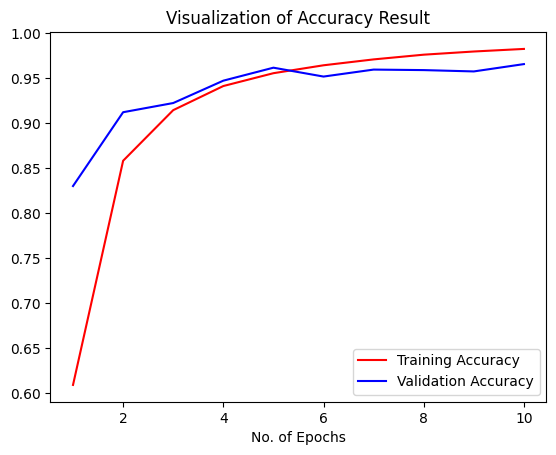

In [33]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


In [12]:
class_name = validation_set.class_names


In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'myenv/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [37]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 963s 55ms/step 


In [38]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [39]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [40]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [42]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.96      0.96       504
                                 Apple___Black_rot       0.95      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.96      0.97       440
                                   Apple___healthy       0.98      0.94      0.96       502
                               Blueberry___healthy       0.95      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.90      0.92       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.97      0.

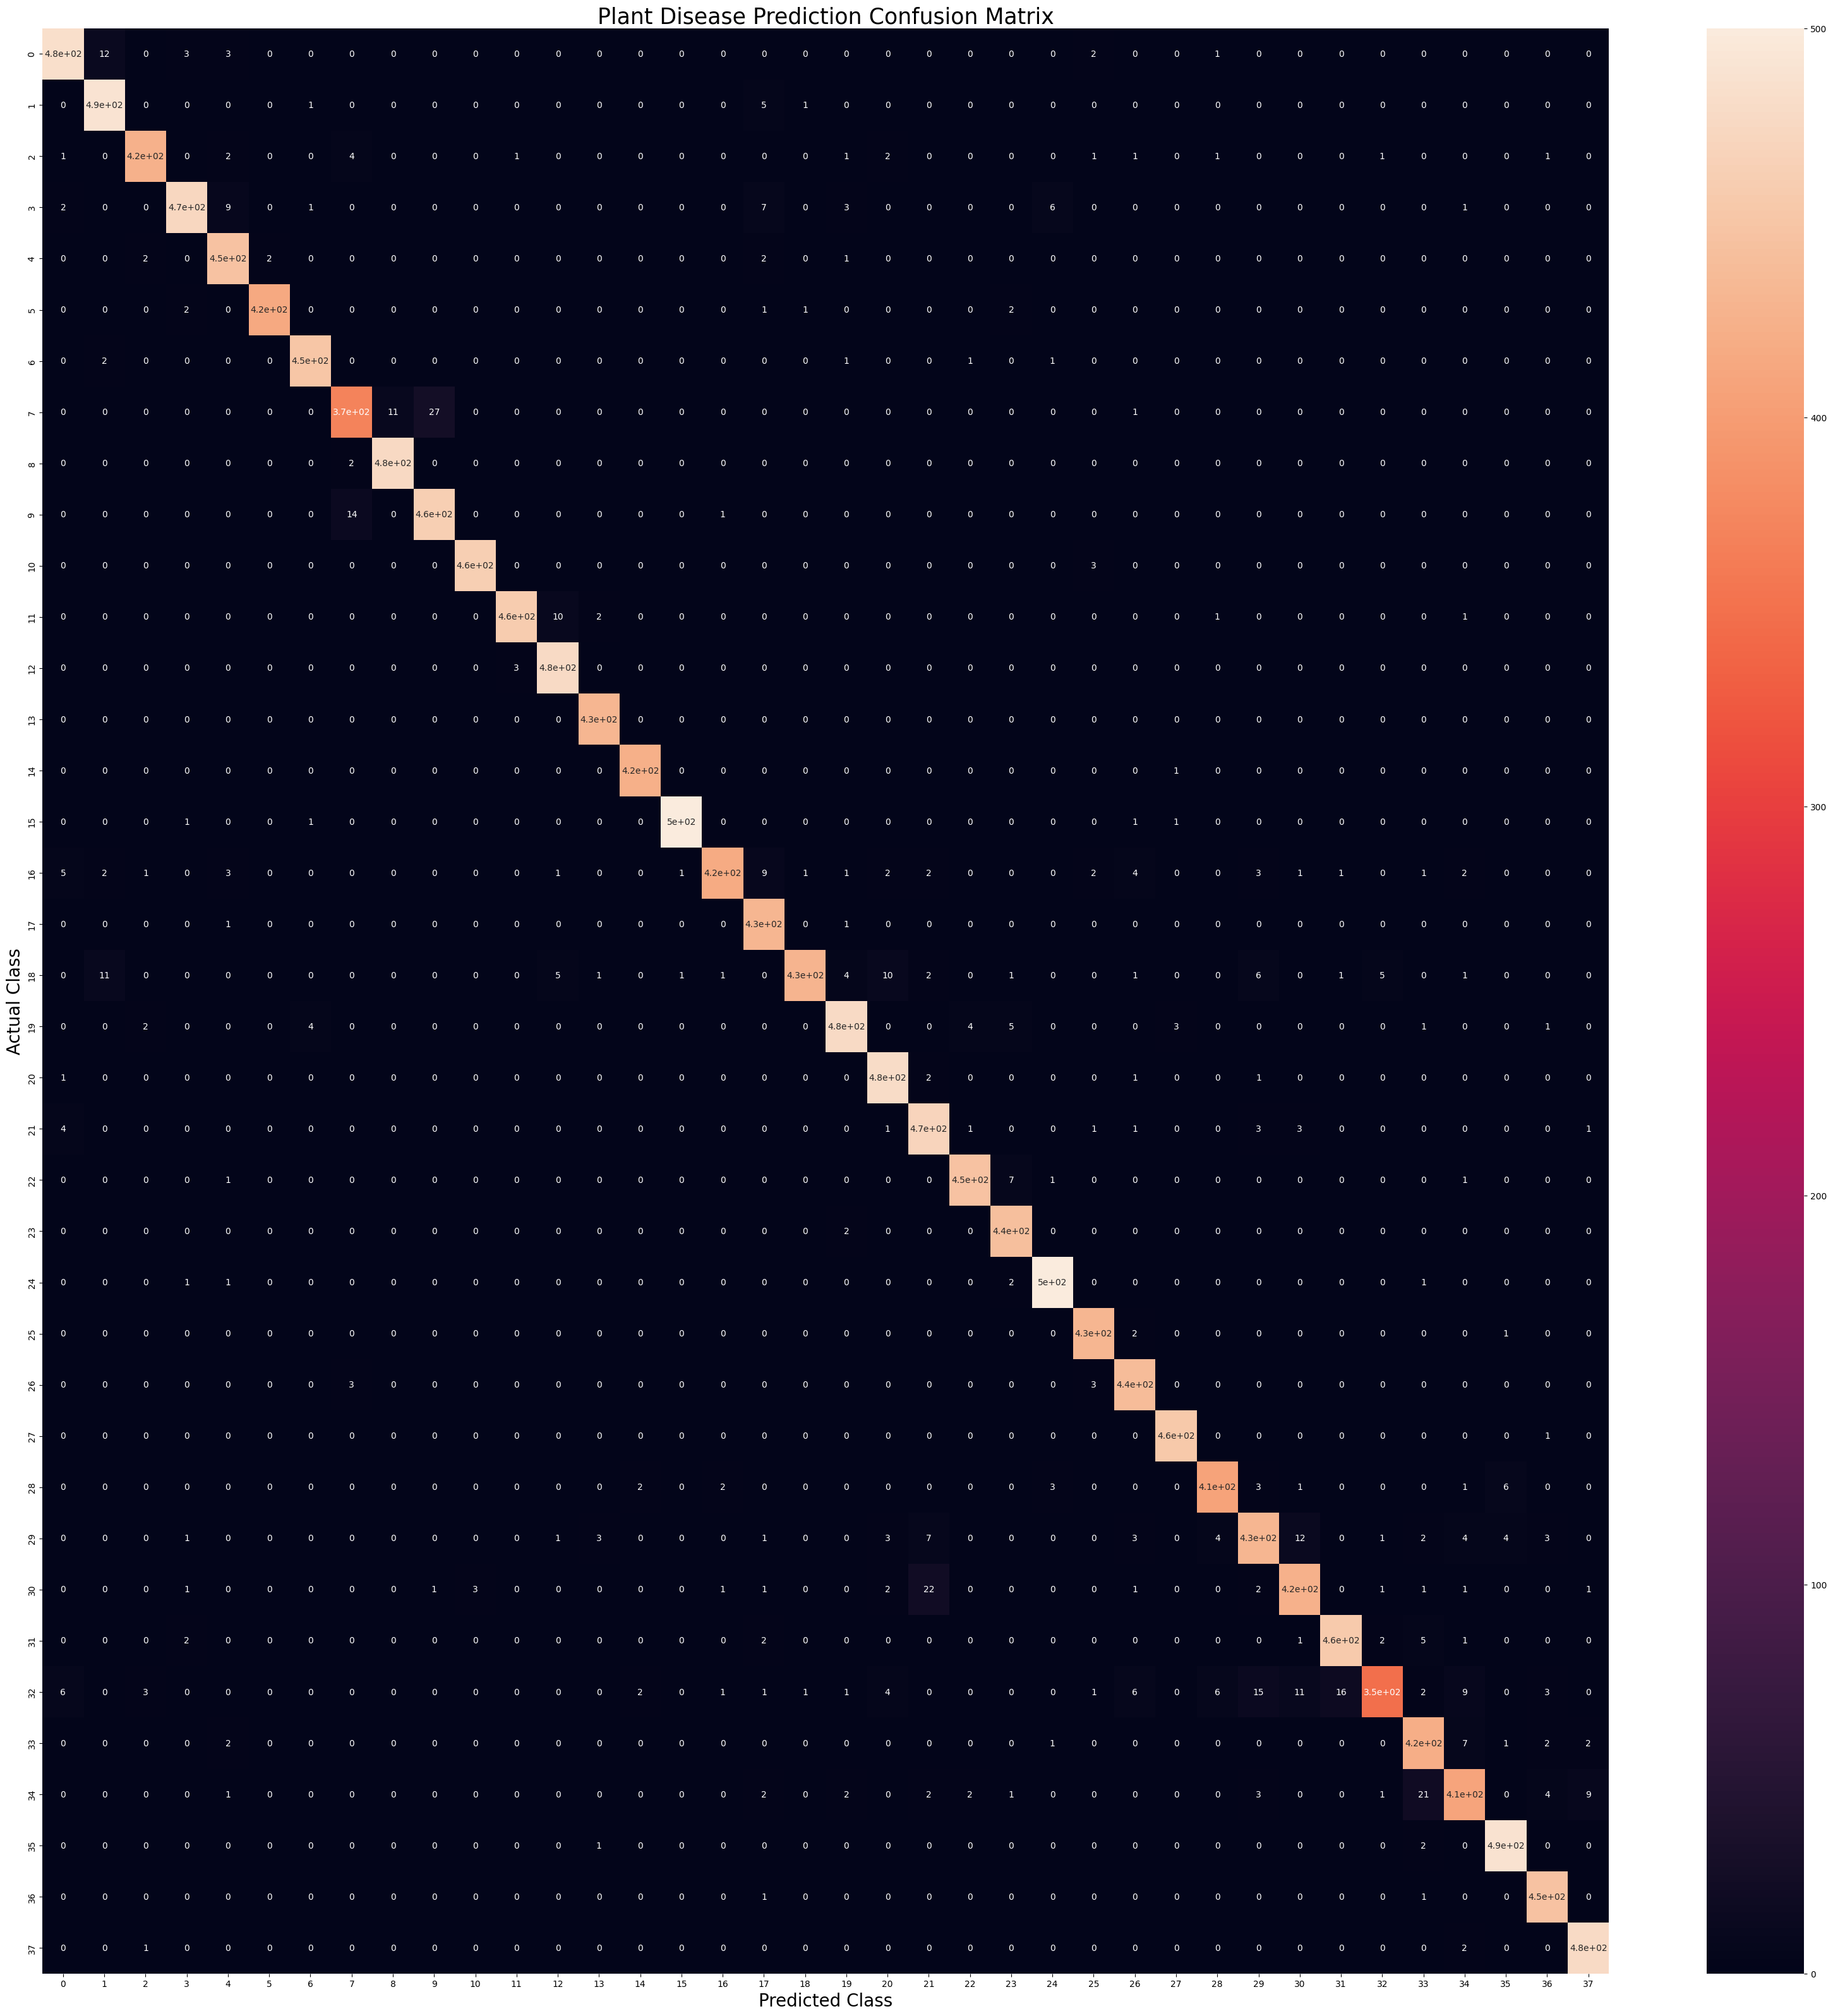

In [43]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

2.TESTING

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [41]:
cnn = tf.keras.models.load_model("C:\Users\saiba\Downloads\png2jpg\test6.jpg")


ValueError: File format not supported: filepath=C:/Users/saiba/Downloads/1a21aabb-6f74-4644-8d9e-a517568b7e9c___FREC_Scab 3095_new30degFlipLR.JPG. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(C:/Users/saiba/Downloads/1a21aabb-6f74-4644-8d9e-a517568b7e9c___FREC_Scab 3095_new30degFlipLR.JPG, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [43]:
cnn = tf.keras.models.load_model("C:/plant/trained_plant_disease_model.keras")


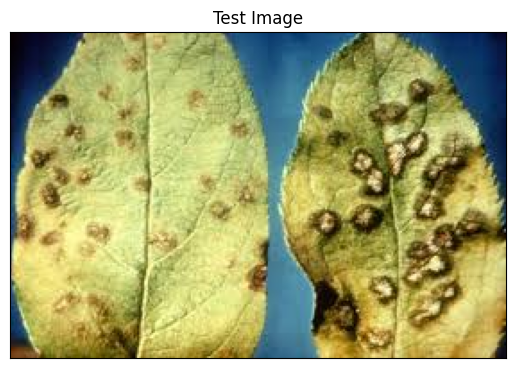

In [64]:
import cv2
image_path = "C:/Users/saiba/Downloads/test5.jpg"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [65]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


In [66]:
print(predictions)


[[3.7715273e-10 1.5144125e-17 5.9771362e-16 9.4408340e-18 2.9017178e-19
  2.6567821e-13 9.8218989e-17 2.1937019e-05 9.9997807e-01 7.5928895e-13
  9.4550849e-15 1.5563647e-16 6.5868022e-15 3.0402150e-11 7.3410335e-19
  5.8080582e-18 2.0295485e-17 3.8788277e-18 2.0699520e-14 4.3794099e-16
  5.1473568e-09 1.1184813e-19 3.6620300e-13 1.6918533e-19 3.5677269e-21
  1.3795470e-12 6.7675233e-11 6.1868954e-17 9.3040205e-23 1.8164734e-10
  3.0720298e-11 6.9140925e-20 6.4919504e-18 2.2236848e-21 3.1233422e-19
  2.0413407e-19 6.4740850e-21 1.6138735e-18]]


In [67]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

8


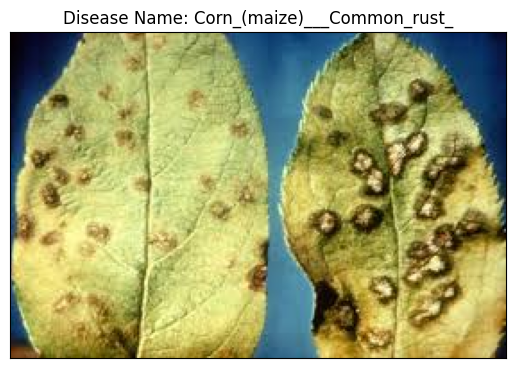

In [68]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:/plant/myenv/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [11]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'myenv/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.
